# Kernel Fisher LDA on circles

In [725]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics

In [726]:
np.random.seed(0)

In [727]:
# Try other kernel
# Try XOR 
# 3 class circle 
# explain each of these kernels. 

In [767]:

# random data circle, x^2 + y^2 < 0.5 = inside cirlce
m = 200
circle_data = np.random.normal(0, 1, (m, 2))
circle_class_data = [[], [], []]
circle_labels = []
circle_labels_indices = [[], [], []]
for i, d in enumerate(circle_data):
    x = d[0]
    y = d[1]
    if np.sqrt(x**2 + y**2) < 0.5:
        circle_labels.append(0)
        circle_class_data[0].append((x, y))
        circle_labels_indices[0].append(i)
    elif np.sqrt(x**2 + y**2) < 1:
        circle_labels.append(1)
        circle_class_data[1].append((x, y))
        circle_labels_indices[1].append(i)
    else:
        circle_labels.append(2)
        circle_class_data[2].append((x, y))
        circle_labels_indices[2].append(i)



In [729]:
"""
# XOR!
m = 200
circle_data = np.random.normal(0, 1, (m, 2))
circle_class_data = [[], []]
circle_labels = []
circle_labels_indices = [[], []]
for i, d in enumerate(circle_data):
    x = d[0]
    y = d[1]
    if (d[0] > 0 and d[1] > 0) or (d[0] < 0 and d[1] < 0):
        circle_labels.append(1)
        circle_class_data[1].append((x, y))
        circle_labels_indices[1].append(i)
    else:
        circle_labels.append(0)
        circle_class_data[0].append((x, y))
        circle_labels_indices[0].append(i)


"""

In [768]:
# separate data by class
circle_class_data

[[(-0.14357951171632055, -0.3820254489503836),
  (0.35950439957101016, -0.14456681693373594),
  (0.44103290727315136, 0.17879286573317985),
  (-0.19839889682004574, 0.09419230031014657),
  (-0.4223148241252707, 0.10471402943328433),
  (0.2280533251240672, 0.20147994670443287),
  (-0.04932407014757259, 0.2390336012467649),
  (0.21496559062609352, 0.09721923200291803),
  (0.22246316400860677, -0.08837552319915497),
  (0.09837790681547566, 0.38141625420917086),
  (0.0674922572408068, 0.016338084112892493),
  (-0.1682142227670741, 0.37791010173847506),
  (-0.12824197402770202, -0.27177156649069667),
  (0.21717963263828013, 0.07821118109215218),
  (-0.16975829390248548, -0.1341327827684201),
  (0.05517135478023174, 0.2989774561190176),
  (0.23986710589527857, 0.15895867412564327),
  (0.4209182841756566, 0.24660218626133443),
  (-0.3004787855854223, -0.3550287310553741),
  (-0.45408036251560513, 0.08595197343438468),
  (0.25280350541915453, -0.4080147090398969),
  (0.33053274323491577, -0.14

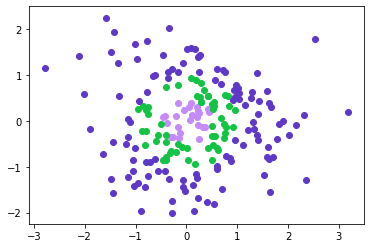

In [772]:
# circles
for i, c in enumerate(circle_class_data):
    plt.scatter(np.array(circle_class_data[i])[:, :1], np.array(circle_class_data[i])[:, 1:], color=np.random.rand(3,))

#plt.scatter(ex1, np.zeros(len(ex1)), color='blue')

#plt.scatter(data[:,:1], data[:,1:])

In [773]:

# Quadratic Kernel
def poly_kernel(x_1, x_2):
    return ((1/2)*np.matmul(x_1.T, x_2) + 1)**3

#chosen_kernel = sklearn.metrics.pairwise.polynomial_kernel #sklearn.metrics.pairwise.rbf_kernel
chosen_kernel = poly_kernel

In [774]:
chosen_kernel(np.reshape(np.array([1, 2]), (2, 1)), np.reshape(np.array([3, 4]), (2, 1)))[0][0]

274.625

In [775]:
#kernel_matrix = chosen_kernel(circle_data)

In [776]:
"""
# kernel LDA get kernels from scikit learn
chosen_kernel = quadratic_kernel

kernel_matrix = [] #this is a vector!
for i, ccd in enumerate(circle_class_data):
    kernel_matrix.append([])
    for j, cid in enumerate(circle_data):
        M_ij = 0
        for ccd_w in ccd:
            M_ij += chosen_kernel(cid, ccd_w)
        M_ij = M_ij/float(len(ccd))
        kernel_matrix[i].append(M_ij)
kernel_matrix = np.array(kernel_matrix)

kernel_mean_total = np.sum(kernel_matrix, axis=0)
  
M = None

# What is happening!
for cd in kernel_matrix:
    n = len(cd)
    M_i = np.mean(cd, axis=0)
    temp = np.reshape((m_i - mean_total), (len(mean_total), 1))
    if S_B is None:
        S_B = n*np.dot(temp, temp.T)
        #print(S_B)
        continue
    #print("new addition", n*np.dot(temp, temp.T))
    S_B += n*np.dot(temp, temp.T)
    #print(S_B)
print(S_B) 
"""


'\n# kernel LDA get kernels from scikit learn\nchosen_kernel = quadratic_kernel\n\nkernel_matrix = [] #this is a vector!\nfor i, ccd in enumerate(circle_class_data):\n    kernel_matrix.append([])\n    for j, cid in enumerate(circle_data):\n        M_ij = 0\n        for ccd_w in ccd:\n            M_ij += chosen_kernel(cid, ccd_w)\n        M_ij = M_ij/float(len(ccd))\n        kernel_matrix[i].append(M_ij)\nkernel_matrix = np.array(kernel_matrix)\n\nkernel_mean_total = np.sum(kernel_matrix, axis=0)\n  \nM = None\n\n# What is happening!\nfor cd in kernel_matrix:\n    n = len(cd)\n    M_i = np.mean(cd, axis=0)\n    temp = np.reshape((m_i - mean_total), (len(mean_total), 1))\n    if S_B is None:\n        S_B = n*np.dot(temp, temp.T)\n        #print(S_B)\n        continue\n    #print("new addition", n*np.dot(temp, temp.T))\n    S_B += n*np.dot(temp, temp.T)\n    #print(S_B)\nprint(S_B) \n'

In [777]:

kernel_matrix = []
for i in range(len(circle_data)):
    kernel_matrix.append([])
    for j in range(len(circle_data)):
        kernel_matrix[i].append(chosen_kernel(np.reshape(circle_data[i], (2, 1)), np.reshape(circle_data[j], (2, 1)))[0][0])
kernel_matrix = np.array(kernel_matrix)

#kernel_matrix = chosen_kernel(np.reshape(circle_data, (m, 2)))

In [778]:
kernel_matrix

array([[8.83971286, 0.96004434, 1.14060918, ..., 0.03177039, 0.25350098,
        0.59171637],
       [0.96004434, 1.46368314, 0.41431446, ..., 0.80840709, 1.70462528,
        1.57512254],
       [1.14060918, 0.41431446, 3.23354308, ..., 1.39014115, 0.24760186,
        0.32853614],
       ...,
       [0.03177039, 0.80840709, 1.39014115, ..., 3.24983048, 1.43024568,
        1.03228727],
       [0.25350098, 1.70462528, 0.24760186, ..., 1.43024568, 2.70285146,
        2.10686135],
       [0.59171637, 1.57512254, 0.32853614, ..., 1.03228727, 2.10686135,
        1.80228363]])

In [779]:
class_kernel_matrix = [[] for i in range(len(circle_class_data))]
for i, l in enumerate(circle_labels):
    class_kernel_matrix[l].append(kernel_matrix[i])

In [780]:
np.shape(kernel_matrix)

(200, 200)

In [781]:
class_kernel_matrix

[[array([0.35204836, 0.95796355, 1.06535887, 0.93482725, 0.76608576,
         1.30119194, 1.24531838, 0.60776426, 0.55169017, 1.15730675,
         0.3420796 , 0.508666  , 0.64086833, 0.37085984, 0.76357019,
         1.70311621, 1.27122166, 1.00542589, 0.5566493 , 0.95451092,
         0.70682142, 0.88045206, 0.81526906, 1.03458173, 0.72992508,
         0.98879535, 1.52401567, 0.4923161 , 1.03126887, 0.84429145,
         2.2401409 , 0.87889445, 0.42536234, 0.32818274, 1.86112718,
         2.22015865, 0.90142187, 0.4990128 , 1.90480908, 1.08757302,
         2.108375  , 1.0577954 , 1.08576457, 1.49869183, 0.40915029,
         0.47963108, 2.24970186, 0.55638805, 0.41078318, 0.5457003 ,
         1.27091347, 1.56404749, 1.82644409, 0.53303843, 0.39894776,
         0.62540878, 1.51207564, 1.82439008, 1.00273331, 0.77889653,
         0.97629176, 0.72958901, 2.44507813, 2.08780585, 0.54015569,
         1.54732941, 0.99714764, 1.29251517, 1.50400665, 1.64985224,
         1.90016808, 0.83447827, 1

In [782]:
k_matrix = np.mean(kernel_matrix, axis=0)

In [783]:
k_matrix

array([ 2.19892759,  1.30774739,  1.42081451,  2.93835882,  1.33189832,
        2.1543124 ,  6.92251823,  1.50943407,  1.46828735,  1.0680068 ,
        2.34914594,  1.79631702,  1.7075118 ,  2.10549966,  4.79077821,
        1.51413342,  1.09003077,  1.18859072,  1.65452073,  1.49224661,
        1.31949333,  2.85131959,  1.23893423,  1.28612301,  1.1924147 ,
        0.98719536,  1.66876983,  1.73053318,  1.03630216,  1.09560438,
        3.3618284 ,  1.01307826,  3.19228168,  2.36553634,  1.76918252,
        2.85112717,  1.07698276,  2.21553921,  1.80791684,  4.06416328,
        2.21980051,  2.36660784,  1.22672223,  1.29415059,  2.13579627,
        2.21005635,  3.15965038,  3.60187636,  2.01882834,  2.97659112,
        1.47325822,  1.48784033,  1.70307353,  1.58604182, 10.59993564,
        2.92488151,  1.29062381,  2.05669166,  1.09107418,  1.09065065,
        1.01639641,  1.19055335,  2.76081955,  2.29841255,  1.48335936,
        2.09490495,  1.36893259,  1.09777688,  2.00854253,  1.44

In [784]:
np.shape(kc_matrix)

(2, 200)

In [785]:
kc_matrix = [] #L x 1 x n classes. 
for i, ccd in enumerate(circle_class_data):
    kc_matrix.append([])
    for j, cid in enumerate(circle_data):
        # sum up the length
        n = len(ccd)
        kc_matrix[i].append(1/float(n)*sum([chosen_kernel(np.reshape(cid, (2, 1)), np.reshape(ccd_w, (2, 1)))[0][0] for ccd_w in ccd]))
kc_matrix = np.array(kc_matrix)


In [786]:
np.shape(k_matrix)

(200,)

In [787]:
kj_matrix = [] #N x L x Li. 
for i, ccd in enumerate(circle_class_data):
    kj_matrix.append([])
    for j, cid in enumerate(circle_data):
        kj_matrix[i].append([])
        for k, ccd_w in enumerate(ccd):
            kj_matrix[i][j].append(chosen_kernel(np.reshape(cid, (2, 1)), np.reshape(ccd_w, (2, 1)))[0][0])

#kj_matrix = np.array(kj_matrix)


In [788]:
np.shape(kj_matrix)

(3, 200)

In [789]:
np.shape(kc_matrix)

(3, 200)

In [790]:
np.shape(k_matrix)

(200,)

In [791]:
"""
def kernel_between_matrix(kernel_matrix, k_matrix, class_kernel_matrix):
    M = None
    for i, ckm in enumerate(class_kernel_matrix):
        n = len(class_kernel_matrix[i])
        #pdb.set_trace()
        temp = np.reshape(np.sum(ckm - k_matrix, axis=0), (m, 1))
        if M is None:
            M = n*np.matmul(temp, temp.T)
            continue
        M += n*np.matmul(temp, temp.T)
    return M
"""     

    

'\ndef kernel_between_matrix(kernel_matrix, k_matrix, class_kernel_matrix):\n    M = None\n    for i, ckm in enumerate(class_kernel_matrix):\n        n = len(class_kernel_matrix[i])\n        #pdb.set_trace()\n        temp = np.reshape(np.sum(ckm - k_matrix, axis=0), (m, 1))\n        if M is None:\n            M = n*np.matmul(temp, temp.T)\n            continue\n        M += n*np.matmul(temp, temp.T)\n    return M\n'

In [792]:
#M = kernel_between_matrix(kernel_matrix, k_matrix, class_kernel_matrix)

In [793]:
"""
def kernel_within_matrix(kernel_matrix, class_kernel_matrix):
    N = None
    for i, ckm in enumerate(class_kernel_matrix):
        n = len(class_kernel_matrix[i])
        mid = np.identity(n) - (np.ones((n, n))/float(n))
        print(np.shape(mid))
        if N is None:
            #pdb.set_trace()
            test = np.matmul(np.transpose(ckm), mid)
            N = np.matmul(test, ckm)
            continue
        N += np.matmul(np.matmul(np.transpose(ckm), mid), ckm)
    eps=1*np.diag(np.repeat(100, m))
    return N + eps
"""

'\ndef kernel_within_matrix(kernel_matrix, class_kernel_matrix):\n    N = None\n    for i, ckm in enumerate(class_kernel_matrix):\n        n = len(class_kernel_matrix[i])\n        mid = np.identity(n) - (np.ones((n, n))/float(n))\n        print(np.shape(mid))\n        if N is None:\n            #pdb.set_trace()\n            test = np.matmul(np.transpose(ckm), mid)\n            N = np.matmul(test, ckm)\n            continue\n        N += np.matmul(np.matmul(np.transpose(ckm), mid), ckm)\n    eps=1*np.diag(np.repeat(100, m))\n    return N + eps\n'

In [794]:
# something must be wrong here!
import pdb
def kernel_between_matrix(kc_matrix, k_matrix, class_data):
    kernel_S_B = None
    k_kt = np.matmul(np.reshape(k_matrix, (m, 1)), np.reshape(k_matrix, (m, 1)).T)
    print(np.shape(k_kt))
    for i, kc in enumerate(kc_matrix):
        n = len(class_data[i])
        kckc = np.matmul(np.reshape(kc, (m, 1)), np.reshape(kc, (m, 1)).T)
        temp = (kckc - k_kt)
        if kernel_S_B is None:
            #kernel_S_B = n*np.matmul(np.reshape(kc, (m, 1)),np.reshape(kc, (m, 1)).T) - k_kt
            print(np.shape(temp), np.shape(kc))
            kernel_S_B = float(n)*temp
            continue
        #kernel_S_B += n*np.matmul(np.reshape(kc, (m, 1)),np.reshape(kc, (m, 1)).T) - k_kt
        kernel_S_B += float(n)*temp
    return kernel_S_B

def kernel_within_matrix2(kj_matrix, class_data, g):
    rhs = None
    for i, kj in enumerate(kj_matrix):
        n = len(class_data[i])
        mid = np.identity(n) - (np.ones((n, n))/float(n))
        print(np.shape(mid))
        if rhs is None:
            #pdb.set_trace()
            test = np.matmul(np.reshape(kj, (m, n)), mid)
            rhs = np.matmul(test, np.reshape(kj, (m, n)).T)
            continue
        rhs += np.matmul(np.matmul(kj, mid), np.transpose(kj))
    eps=10*np.diag(np.repeat(100, m))
    return rhs + eps

In [795]:
np.shape(kj_matrix[0])

(200, 27)

In [796]:
M = kernel_between_matrix(kc_matrix, k_matrix, circle_class_data)
#kernel_S_W = kernel_within_matrix(kernel_matrix, kc_matrix, circle_class_data)
N = kernel_within_matrix2(kj_matrix, circle_class_data, 10)

(200, 200)
(200, 200) (200,)
(27, 27)
(59, 59)
(114, 114)


In [797]:
N

array([[2573.33120895,  -55.7813522 ,  179.99161568, ..., -597.58313006,
        -406.10514722, -199.35301991],
       [ -55.7813522 , 1156.34465921, -225.34520447, ..., -101.8057994 ,
         227.7688946 ,  190.06154778],
       [ 179.99161568, -225.34520447, 1698.63494422, ...,   63.59889271,
        -335.29891936, -273.01117704],
       ...,
       [-597.58313006, -101.8057994 ,   63.59889271, ..., 1590.58645348,
          53.13992198,  -47.857294  ],
       [-406.10514722,  227.7688946 , -335.29891936, ...,   53.13992198,
        1477.42319883,  331.3688739 ],
       [-199.35301991,  190.06154778, -273.01117704, ...,  -47.857294  ,
         331.3688739 , 1251.67122676]])

In [798]:
M

array([[119.93919639,  27.80658585,  49.39822976, ...,  49.45614611,
         64.20588241,  40.51263949],
       [ 27.80658585,   6.4730421 ,  11.44736577, ...,  11.58127028,
         14.96443671,   9.43849056],
       [ 49.39822976,  11.44736577,  20.34615928, ...,  20.34686067,
         26.42869054,  16.67670498],
       ...,
       [ 49.45614611,  11.58127028,  20.34686067, ...,  20.89759046,
         26.82037927,  16.90663079],
       [ 64.20588241,  14.96443671,  26.42869054, ...,  26.82037927,
         34.60724365,  21.82519094],
       [ 40.51263949,   9.43849056,  16.67670498, ...,  16.90663079,
         21.82519094,  13.76467596]])

In [799]:
# eigenvalue problem
vals, vecs = np.linalg.eig(np.dot(np.linalg.inv(N), M))
eig_pairs = [(np.abs(vals[i]), vecs[:,i]) for i in range(len(vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

In [807]:
w_circle_kernel = [eig_pairs[0][1], eig_pairs[1][1]]

In [808]:
np.shape(w_circle_kernel)

(2, 200)

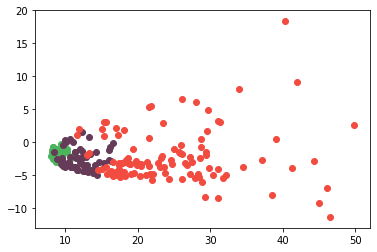

In [811]:
# Visualize what it looks like.
for i, j in enumerate(circle_class_data):
    ex_circle_0 = np.array([np.matmul(w_circle_kernel, np.reshape(d, (m, 1))) for d in class_kernel_matrix[i]])
    plt.scatter(ex_circle_0[:, :1], ex_circle_0[:, 1:], color=np.random.rand(3,))

    
# dope!

In [762]:
# Are new samples with old training samples or new samples?

In [763]:
np.shape(kc_matrix)

(2, 200)

In [764]:
# Try XOR or circle for my other guy.

In [765]:
# extend to 3 dimensions